<a href="https://colab.research.google.com/github/habtamuadargaso/Python-for-Data-Science-/blob/main/Final_project_Data_cleaning_and__Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Call library 

In [174]:
#For data review
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for listing the directory
import os

#for data cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# for printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.express as px
import folium
from folium import plugins


#Loading and viewing the dataset

In [207]:
airbnb = pd.read_csv('/content/Airbnb_Open_Data.csv') 


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83619 entries, 0 to 83618
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83619 non-null  int64  
 1   NAME                            83399 non-null  object 
 2   host id                         83619 non-null  int64  
 3   host_identity_verified          83375 non-null  object 
 4   host name                       83265 non-null  object 
 5   neighbourhood group             83590 non-null  object 
 6   neighbourhood                   83603 non-null  object 
 7   lat                             83611 non-null  float64
 8   long                            83611 non-null  float64
 9   country                         83259 non-null  object 
 10  country code                    83523 non-null  object 
 11  instant_bookable                83523 non-null  object 
 12  cancellation_policy             

In [109]:
airbnb.rename(columns={'minimum nights':'minimum_nights'}, inplace = True)

airbnb.rename(columns={'host id':'host_id'}, inplace = True)


In [110]:
# First view to understand how the data is organized
airbnb.head()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum_nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [111]:

airbnb.columns


Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum_nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [112]:
airbnb.dtypes

id                                  int64
NAME                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum_nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [113]:
airbnb.head()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum_nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [114]:
airbnb.tail()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum_nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
83614,47181348,Cozy room in spacious and sunny apartment,49191275331,verified,Angela,Queens,Ridgewood,40.69787,-73.90008,United States,...,$166,2.0,4.0,5/31/2019,0.19,4.0,1.0,175.0,"Access to kitchen appliances and cutlery, etc....",NaN
83615,47181901,Ashes Cove,71224224211,unconfirmed,Aston,Queens,Springfield Gardens,40.66013,-73.77166,United States,...,$147,3.0,23.0,6/2/2019,1.18,2.0,2.0,357.0,Please treat our home as if it were your own.,NaN
83616,47182453,Lavish 3 bedroom near Penn Station / MSG,81547119719,unconfirmed,Michael,Manhattan,Chelsea,40.74881,-73.99375,United States,...,$150,2.0,42.0,7/1/2019,1.99,4.0,1.0,36.0,You are my guest - please behave as such! Thi...,NaN
83617,47183005,Chez Jazzy Midtown East,9831488219,verified,Chez,Manhattan,Midtown,40.75614,-73.96706,United States,...,$109,5.0,30.0,10/31/2018,1.40,2.0,1.0,0.0,We expect our guests to behave in a respectful...,NaN
83618,47183557,"Clean, Comfortable, Sunny Room 5 Min from LGA",77508590379,verified,Lisa,Queens,Ditmars Steinway,40.77429,-73.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#Find the number of unique values
airbnb.nunique().sort_values(ascending=False)

id                                83619
host_id                           83618
NAME                              61253
lat                               21991
long                              17775
host_name                         13185
last review                        2477
house_rules                        1976
price                              1151
reviews per month                  1016
number of reviews                   476
availability 365                    438
service fee                         231
neighbourhood                       224
minimum_nights                      149
calculated host listings count       78
Construction year                    20
neighbourhood group                   7
review rate number                    5
room type                             4
cancellation_policy                   3
instant_bookable                      2
host_identity_verified                2
country code                          1
country                               1


In [116]:
#From above output, you can see id is also duplicated. check them once
airbnb.drop(['id','host_id','long','last review','host_identity_verified','lat'],axis=1).describe(include='all')

,NAME,host_name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum_nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,83399,83265,83590,83603,83259,83523,83523,83552,83618,83428.000000,83402,83377,83237.000000,83449.000000,70667.000000,83351.000000,83451.000000,83180.000000,37906,2
unique,61253,13185,7,224,1,1,2,3,4,NaN,1151,231,NaN,NaN,NaN,NaN,NaN,NaN,1976,1
top,Water View King Bed Hotel Room,Michael,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,NaN,$206,$41,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,41662/AL
freq,30,707,35715,6477,83259,83523,42014,28011,44371,NaN,110,429,NaN,NaN,NaN,NaN,NaN,NaN,2040,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.487139,NaN,NaN,8.397576,28.310213,1.381245,3.293962,8.588621,145.767865,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.765603,NaN,NaN,32.705271,51.706931,1.774262,1.276126,34.764536,135.648025,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,2.000000,1.000000,0.220000,2.000000,1.000000,7.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,3.000000,7.000000,0.760000,3.000000,1.000000,109.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,5.000000,31.000000,2.000000,4.000000,2.000000,275.000000,NaN,NaN




```
The initial insights, therefore, are:

Host Name 'Michael is the top one, with 707 appearences;

Most of the properties are in the Manhattan island (21.6k out of 48.8k = 44%);

More than 50% of the rentals are for 'Entire home or apt', not just a room;


On average, the rate is $ 152 dollars and that does not seem to vary too much, since 75% of the obervations are under $ 175 dollars;
Minumum night average is 7 nights. People apparently like to stay for a whole week in NYC;
```



#4. Data Cleaning

In [117]:
#Lets start by deleting the duplicated rows listed above
airbnb.drop_duplicates(keep='first', inplace=True)
airbnb.shape

(83619, 26)

In [118]:
#Lets delete the duplicate row on license which we checked earlier
airbnb[~airbnb.license.isnull()]

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum_nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [119]:
#Lets the keep the above row row with more apt data and delete the second one
airbnb.drop(airbnb.index[72947],inplace=True)

In [120]:
airbnb.shape

(83618, 26)

In [121]:
#Now the unique values look good
airbnb.nunique()


id                                83618
NAME                              61253
host_id                           83617
host_identity_verified                2
host_name                         13185
neighbourhood group                   7
neighbourhood                       224
lat                               21991
long                              17775
country                               1
country code                          1
instant_bookable                      2
cancellation_policy                   3
room type                             4
Construction year                    20
price                              1151
service fee                         231
minimum_nights                      149
number of reviews                   476
last review                        2477
reviews per month                  1016
review rate number                    5
calculated host listings count       78
availability 365                    438
house_rules                        1976


In [124]:
#lets find the type of data in few columns
airbnb['neighbourhood group'].value_counts()

Manhattan        35715
Brooklyn         33953
Queens           10891
Bronx             2249
Staten Island      779
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [125]:
#you can see there is discrepencies with teh values just with spelling/case. Lets replace them
airbnb['neighbourhood group'].replace(['manhatan','brookln'],['Manhattan','Brooklyn'],inplace=True)

In [126]:
#lets find the type of data in few columns
airbnb['neighbourhood group'].value_counts()

Manhattan        35716
Brooklyn         33954
Queens           10891
Bronx             2249
Staten Island      779
Name: neighbourhood group, dtype: int64

In [127]:
#Now check again the values of neighbour group
airbnb['neighbourhood group'].value_counts()

Manhattan        35716
Brooklyn         33954
Queens           10891
Bronx             2249
Staten Island      779
Name: neighbourhood group, dtype: int64

In [128]:
#Now chekc the value counts of other columns
airbnb['host_identity_verified'].value_counts()
airbnb['instant_bookable'].value_counts()
airbnb['room type'].value_counts()
airbnb['cancellation_policy'].value_counts()
airbnb['review rate number'].value_counts()

unconfirmed    41704
verified       41670
Name: host_identity_verified, dtype: int64

False    42014
True     41508
Name: instant_bookable, dtype: int64

Entire home/apt    44371
Private room       37351
Shared room         1780
Hotel room           115
Name: room type, dtype: int64

moderate    28011
flexible    27824
strict      27716
Name: cancellation_policy, dtype: int64

5.0    19177
4.0    19159
3.0    19034
2.0    18951
1.0     7029
Name: review rate number, dtype: int64

In [129]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83618 entries, 0 to 83618
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83618 non-null  int64  
 1   NAME                            83398 non-null  object 
 2   host_id                         83618 non-null  int64  
 3   host_identity_verified          83374 non-null  object 
 4   host_name                       83264 non-null  object 
 5   neighbourhood group             83589 non-null  object 
 6   neighbourhood                   83602 non-null  object 
 7   lat                             83610 non-null  float64
 8   long                            83610 non-null  float64
 9   country                         83258 non-null  object 
 10  country code                    83522 non-null  object 
 11  instant_bookable                83522 non-null  object 
 12  cancellation_policy             

In [130]:
#Lets change the datatypes of above columns which we can see as categorised
airbnb = airbnb.astype({'room type':'category','cancellation_policy':'category',
                        'instant_bookable':'category','host_identity_verified':'category',
                        'review rate number':'category','neighbourhood group':'category'})
airbnb['last review'] = pd.to_datetime(airbnb['last review'])

In [131]:
airbnb['price']=airbnb['price'].apply(lambda x: x.replace('$','') if pd.isna(x) == False else x)
airbnb['service fee']=airbnb['service fee'].apply(lambda x: x.replace('$','') if pd.isna(x) == False else x)
airbnb['service fee']=airbnb['service fee'].astype(float)
airbnb['price']=airbnb['price'].apply(lambda x: x.replace(',','') if pd.isna(x) == False else x)
airbnb['price']=airbnb['price'].astype(float)

In [132]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83618 entries, 0 to 83618
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83618 non-null  int64         
 1   NAME                            83398 non-null  object        
 2   host_id                         83618 non-null  int64         
 3   host_identity_verified          83374 non-null  category      
 4   host_name                       83264 non-null  object        
 5   neighbourhood group             83589 non-null  category      
 6   neighbourhood                   83602 non-null  object        
 7   lat                             83610 non-null  float64       
 8   long                            83610 non-null  float64       
 9   country                         83258 non-null  object        
 10  country code                    83522 non-null  object        
 11  in

In [133]:
# Let's check the min and max timestamps
airbnb['last review'].min(), airbnb['last review'].max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [134]:
#We can see the wrong year. Lets clean the review to be the median of the column
airbnb.loc[airbnb[airbnb['last review'].apply(lambda x: x.year) > 2022].index,'last review'] = airbnb['last review'].median()

In [135]:
#Similarly replace all the null values with median value of the column
airbnb.loc[airbnb['last review'].isnull(), 'last review'] = airbnb['last review'].median()

In [136]:
#now find the non null values for review date
airbnb['last review'].isnull().value_counts()
#So the column doesn't have any null values now

False    83618
Name: last review, dtype: int64

In [95]:
airbnb.rename(columns={'host name':'host_name'}, inplace = True)


<Figure size 1008x432 with 0 Axes>

Text(0.5, 0, 'Neighborhood')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Prices per Neighbouhood')

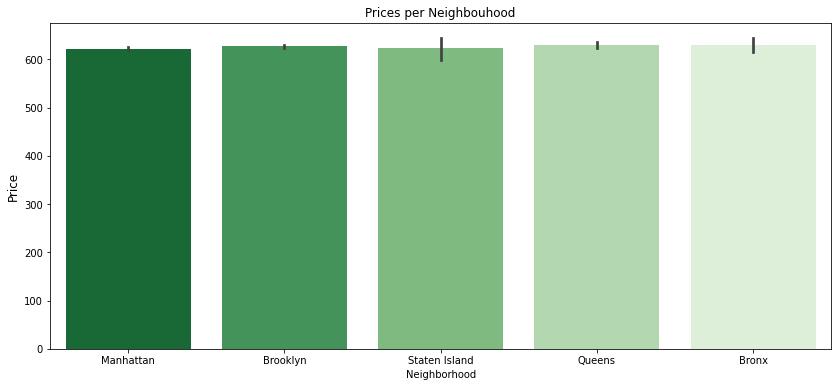

In [164]:
# Prices average by neighbourhood
plt.figure(figsize=(14,6))
sns.barplot(data=airbnb, x='neighbourhood group', y='price',
            order=['Manhattan','Brooklyn','Staten Island', 'Queens', 'Bronx'],
            palette = 'Greens_r')
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.ylabel("Price", fontdict= {'size':12})
plt.title("Prices per Neighbouhood")
plt.show()

# 5. Data Visualisation¶


<Figure size 1008x432 with 0 Axes>

Text(0.5, 0, 'Room Type')

Text(0, 0.5, 'Quantity of Rentals')

Text(0.5, 1.0, 'Rentals by type')

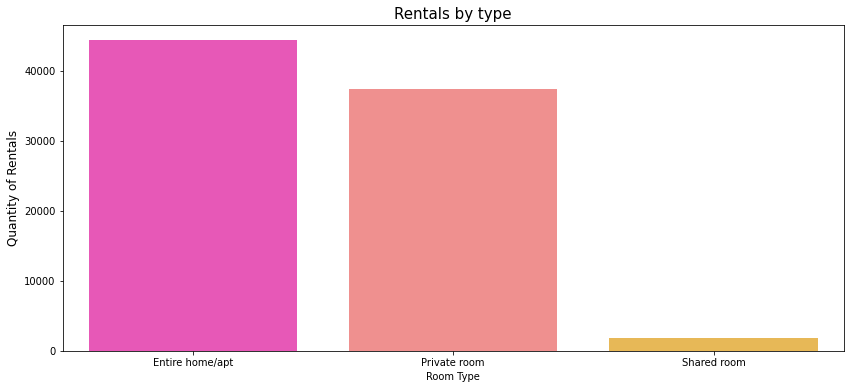

In [165]:
# Type of listings
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'room type', data = airbnb, palette='spring',
                 order=['Entire home/apt','Private room','Shared room'])
plt.xlabel("Room Type",fontdict= {'size':10})
plt.ylabel("Quantity of Rentals", fontdict= {'size':12})
plt.title("Rentals by type", size=15)
plt.show()

<Figure size 1008x432 with 0 Axes>

Text(0.5, 0, 'Neighborhood')

Text(0.5, 1.0, 'Rentals per Neighbouhood')

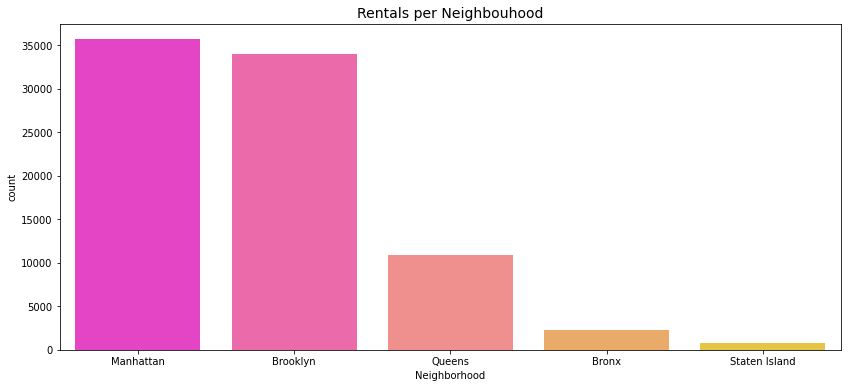

In [159]:
# Where are the most looked neighbourhoods
plt.figure(figsize=(14,6))
g = sns.countplot(x = 'neighbourhood group', data = airbnb, palette = 'spring',
                  order=airbnb['neighbourhood group'].value_counts().index)
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.title("Rentals per Neighbouhood", size=14)
plt.show()

In [167]:
# Create a subset of the dataset with the top 50 renters
index = airbnb.groupby('host_id').id.count().sort_values(ascending=False).head(50).index
airbnb_top50 = airbnb[airbnb.host_id.isin(index)].reset_index()

In [195]:
# Create a function to add a marker to the map
def add_marker(lat, lon, text):
    return folium.CircleMarker(location=[lat, lon],
                               radius=3,
                               color='black',
                               popup=text).add_to(m)

# Creating the base map, initializing it over Manhattan and adding the points
m = folium.Map(location=[40.75, -73.97], zoom_start=13)
for i in range(len(airbnb_top50)):
    add_marker(airbnb_top50.lat[i], airbnb_top50.long[i],str(airbnb_top50.price[i])+'USD')

# Adding the Heat Map 
data_loc= airbnb_top50[['lat','long', 'price']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(m)
m




```
Now with this heat map by location and price ploted, 
it becomes easier to see the locations where the properties are
 concentrated and also that the higher prices are 
 in Brooklyn and Manhattan, where most business and touristic attractions are located

```



# 1.Relational plots¶


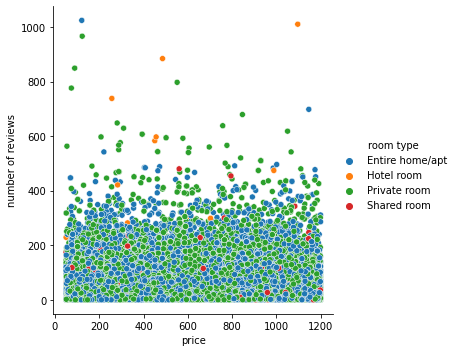

In [ ]:
#scatter plots
sns.relplot(data=airbnb, kind='scatter', x='price', y='number of reviews', hue='room type');

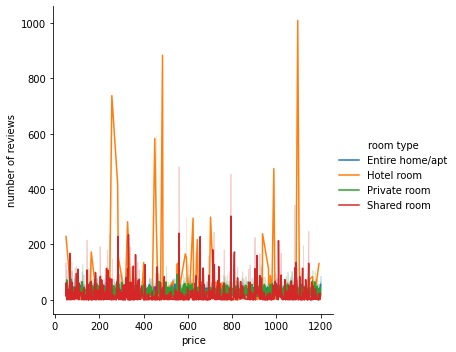

In [ ]:
#line plot
sns.relplot(data=airbnb, kind='line', x='price',  y='number of reviews', hue='room type');

# 2. Distribution Plots¶


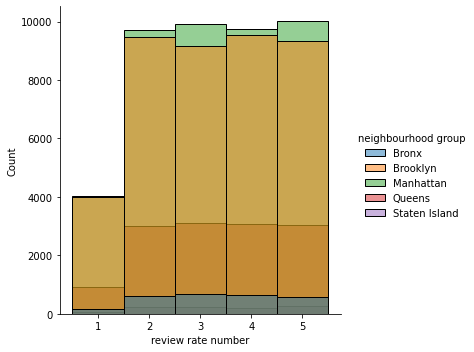

In [ ]:
sns.displot(kind="hist",data=airbnb, x='review rate number', hue='neighbourhood group');

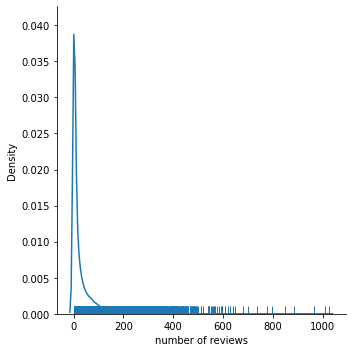

In [ ]:
sns.displot(kind="kde",data=airbnb, x='number of reviews');
sns.rugplot(data=airbnb, x='number of reviews');

# 3. Categorical Plots¶


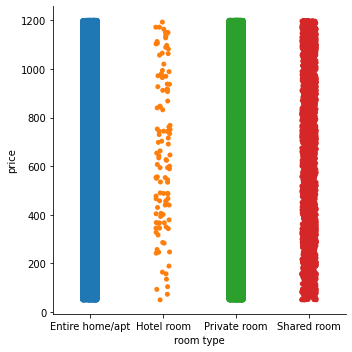

In [ ]:
sns.catplot(kind="strip",data=airbnb, x='room type', y='price');


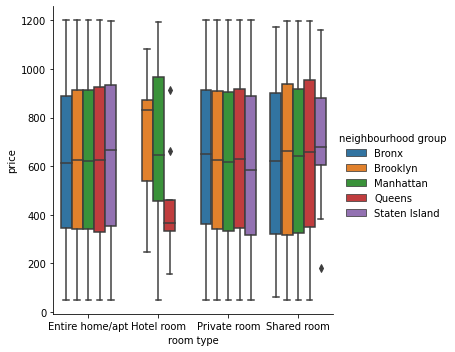

In [ ]:
sns.catplot(kind="box",data=airbnb, x='room type', y='price', hue='neighbourhood group');


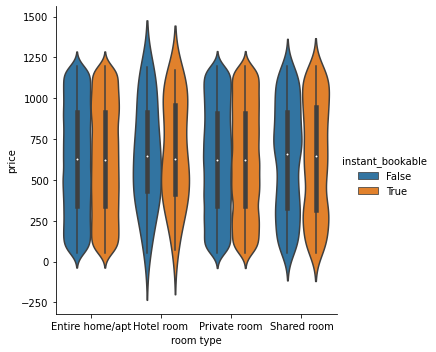

In [ ]:
sns.catplot(kind="violin",data=airbnb, x='room type', y='price', hue='instant_bookable');


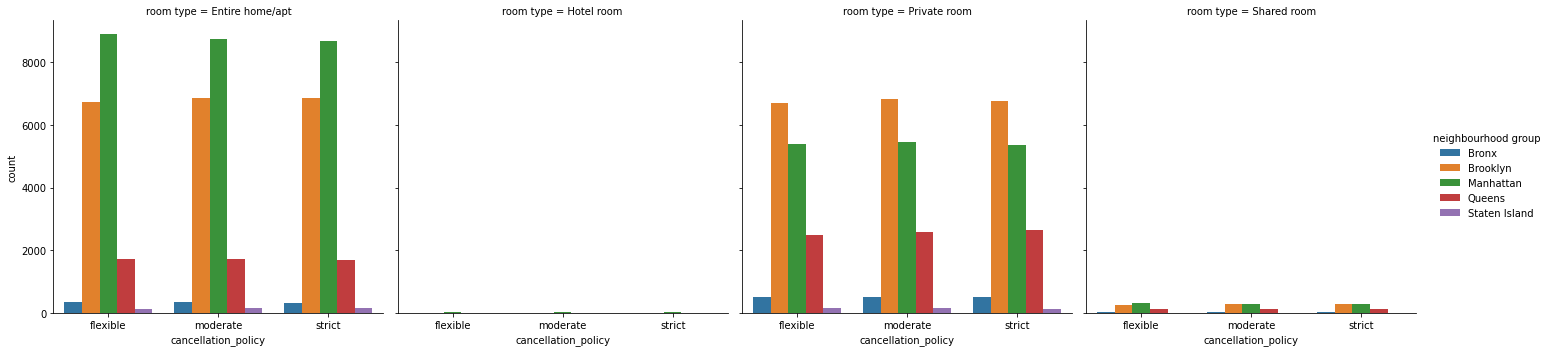

In [ ]:
sns.catplot(data=airbnb, kind='count', x='cancellation_policy', col='room type', hue='neighbourhood group');


# Conclusion Report


In New York, the Manhattan island is the center of the economy, as it hosts many skyscrapers with countless offices doing business every day, as well as many well known touristic attractions like the Empire State Building, Times Square, Central Park that brings another countless number of people to visit the city every year. Thus, naturally the neighbourhood holds 44% of the places listed for rental. Brooklyn comes in second place with 41%, but that is mainly given its proximity to the island.

The amount being spent to stay in the city is somewhere between 120 USD and 150 USD per night for an apartment or a private room and people like to stay less than a week (2 to 5 days are the most common rentals). Usually the clients are looking for a 1 or 2 bedroom apartment or private room - similar to a hotel - and they are interested in locations on the Upper East Side (commonly mentioned as the 'heart of Manhattan'), with easy access to the Central Park and all the other advantages of that area. The reviews also mention concepts like 'private' and 'cozy' rooms, demonstrating the clients are worried about cleanliness and maintenance of the place.

Looking to the other side of the transaction (the hosts who rent their properties), we can see they have their location concentrated on Manhattan and Brooklyn. Top 10 hosts are able to charge more than average for their apartments or rooms - I conclude that this is mainly due to the location - and they keep the space located for 30 days on average. So this leads us to the fact that the top 10 hosts are probably not focusing on renting to tourists, but they are working with businesses, so they keep the location rented for longer periods and for a higher price. For that public, the reviews frequently mention amendments like gym, doorman, rooftop and stock exchange, reinforcing the theory that the top 10 focus on business over tourism